# PHZ Time Series Analysis

This notebook contains the following steps:
## 1 Importing Libraries and Assessing Data
## 2 Analysis of Time Series Data
## 3 Dickey Fuller Testing
## 4 Differencing Data
## 5 Further Testing
## 6 Reflection

## 1 Importing Libraries and Assessing Data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
import nasdaqdatalink

In [5]:
# Configure API key 

quandl.ApiConfig.api_key = '-f7vzWtJNR77233Yecu3'

In [6]:
my_data = quandl.get('WB/AG.LND.AGRI.K2')

ValueError: The column index must be expressed as an integer for WB/AG.LND.AGRI.K2.

### could not locate data in quandl- cleaned and extracted from downloaded data set

In [20]:
path = r"C:\Users\Noah\Achievement 6"

In [21]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Raw', 'WB_US_ARABLE_LAND.csv'))

In [22]:
data.head()

,Year,Arable Land (% of land area)
0,1961,19.721671
1,1962,19.335711
2,1963,19.606375
3,1964,19.430809
4,1966,19.183947


In [23]:
data.shape

(58, 2)

In [24]:
data.columns

Index(['Year', 'Arable Land (% of land area)'], dtype='object')

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data_sub = pd.DataFrame(data)
print(data_sub)

    Year  Arable Land (% of land area)
0   1961                     19.721671
1   1962                     19.335711
2   1963                     19.606375
3   1964                     19.430809
4   1966                     19.183947
5   1967                     19.050962
6   1968                     19.762069
7   1969                     20.662171
8   1970                     20.606597
9   1971                     20.541634
10  1972                     20.476670
11  1973                     20.422624
12  1974                     20.359517
13  1975                     20.359517
14  1976                     20.359517
15  1977                     20.368251
16  1978                     20.608781
17  1979                     20.608781
18  1980                     20.608781
19  1981                     20.608781
20  1982                     20.500690
21  1983                     20.500690
22  1984                     20.500690
23  1985                     20.500690
24  1986                 

## 2 Analysis of Time Series Data

In [28]:
# Convert 'Year' to datetime with January 1st as the day
data_sub['datetime'] = pd.to_datetime(data_sub['Year'].astype(str) + '-01-01')

# Set 'datetime' as the index
data_sub.set_index('datetime', inplace=True)

# Drop the original 'Year' column
data_sub.drop(['Year'], axis=1, inplace=True)

# Ensure the index is correctly formatted and sorted
data_sub = data_sub.sort_index()

# Set frequency to annual ('A')
data_sub.index = data_sub.index.to_period('A').to_timestamp()

# Decompose the time series
# Use period=1 since we have annual data and are not modeling seasonality
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

In [29]:
data_sub.head()

,Arable Land (% of land area)
datetime,
1961-01-01,19.721671
1962-01-01,19.335711
1963-01-01,19.606375
1964-01-01,19.430809
1966-01-01,19.183947


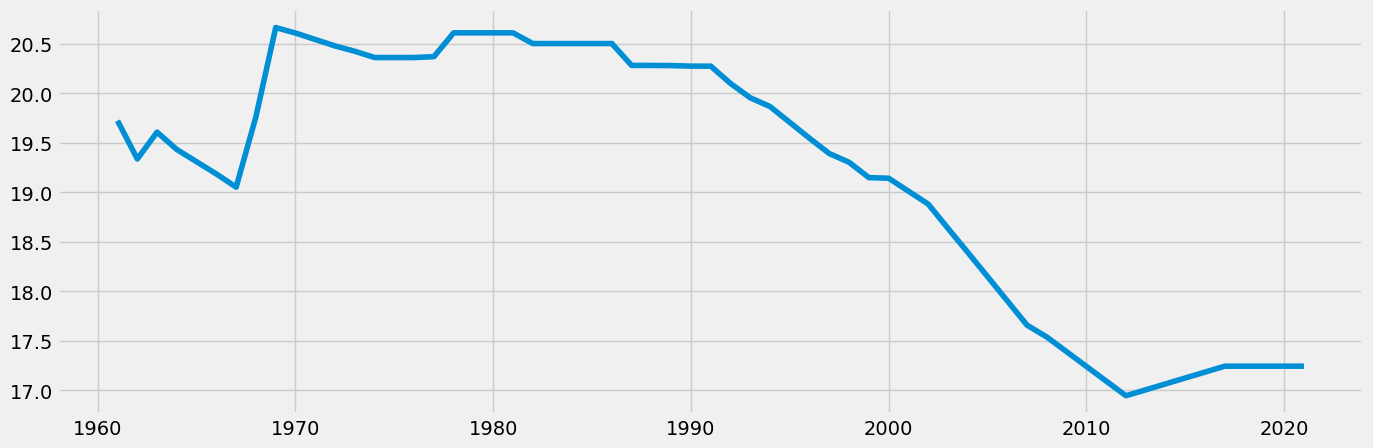

In [30]:

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### we see that arable land in the US has significantly decreased over 6 decades.
#### need to ensure this data is accurate- further stat analysis req'd

In [32]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Arable Land (% of land area)    0
dtype: int64

In [33]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()


15

In [34]:
print(dups)

datetime
1961-01-01    False
1962-01-01    False
1963-01-01    False
1964-01-01    False
1966-01-01    False
1967-01-01    False
1968-01-01    False
1969-01-01    False
1970-01-01    False
1971-01-01    False
1972-01-01    False
1973-01-01    False
1974-01-01    False
1975-01-01     True
1976-01-01     True
1977-01-01    False
1978-01-01    False
1979-01-01     True
1980-01-01     True
1981-01-01     True
1982-01-01    False
1983-01-01     True
1984-01-01     True
1985-01-01     True
1986-01-01     True
1987-01-01    False
1988-01-01     True
1989-01-01    False
1990-01-01    False
1991-01-01     True
1992-01-01    False
1993-01-01    False
1994-01-01    False
1996-01-01    False
1997-01-01    False
1998-01-01    False
1999-01-01    False
2000-01-01    False
2002-01-01    False
2003-01-01    False
2004-01-01    False
2005-01-01    False
2006-01-01    False
2007-01-01    False
2008-01-01    False
2009-01-01    False
2010-01-01    False
2011-01-01    False
2012-01-01    False
2013-01-01 

#### no duplicate years- duplicates acceptable here

In [36]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

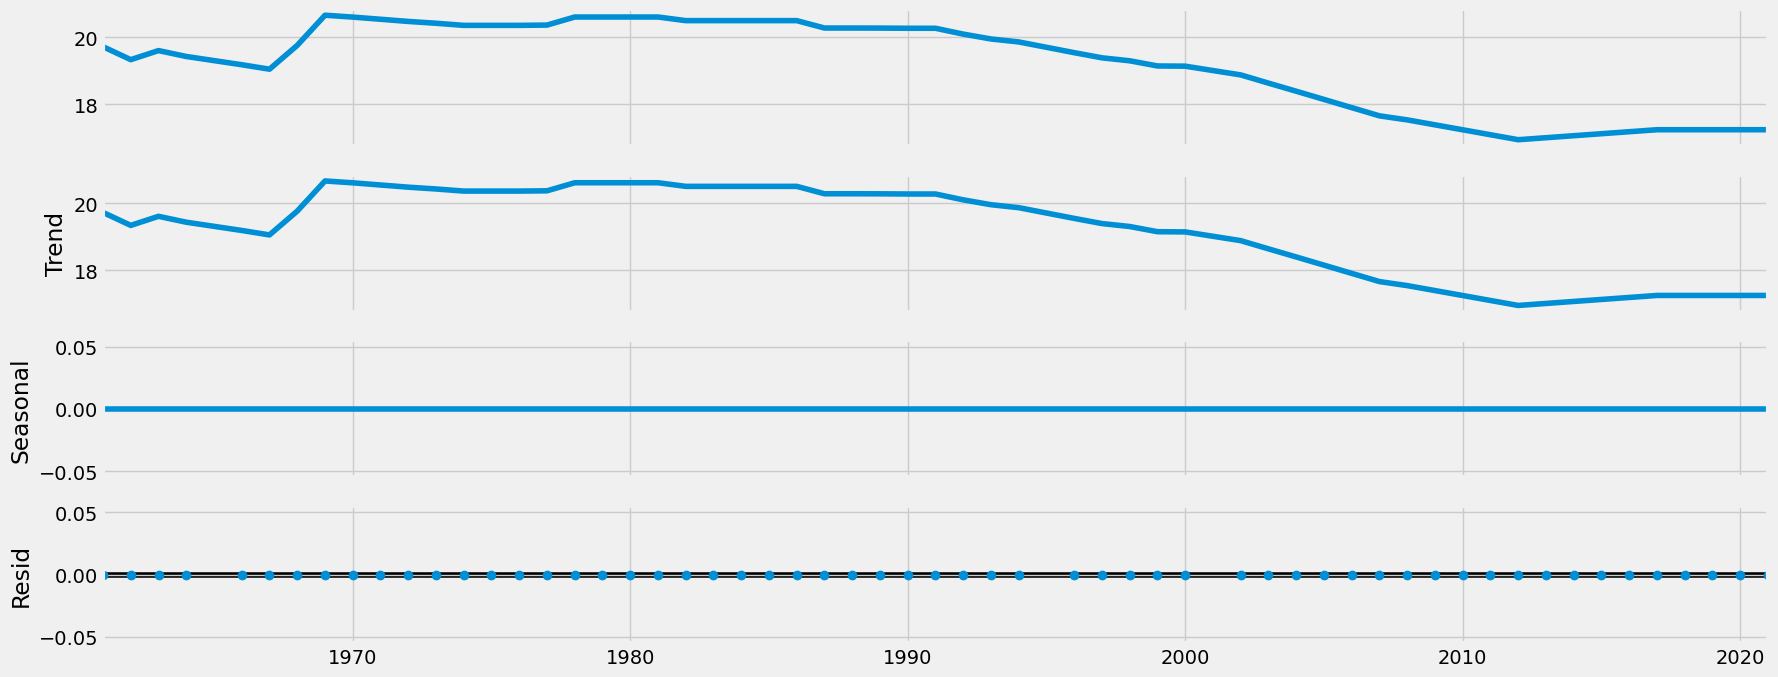

In [37]:
# Plot the separate components

decomposition.plot()
plt.show()

### no seasonality and no noise from data

## 3 Dickey Fuller Testing

In [40]:
# The adfuller() function to import from the model from statsmodels for the test
#however, running it will only return an array of numbers.
#Also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test to check for unit root/ stationary:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Arable Land (% of land area)'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.438305
p-value                         0.131216
Number of Lags Used             9.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


#### Test stat > 5% crit value, cannot reject null

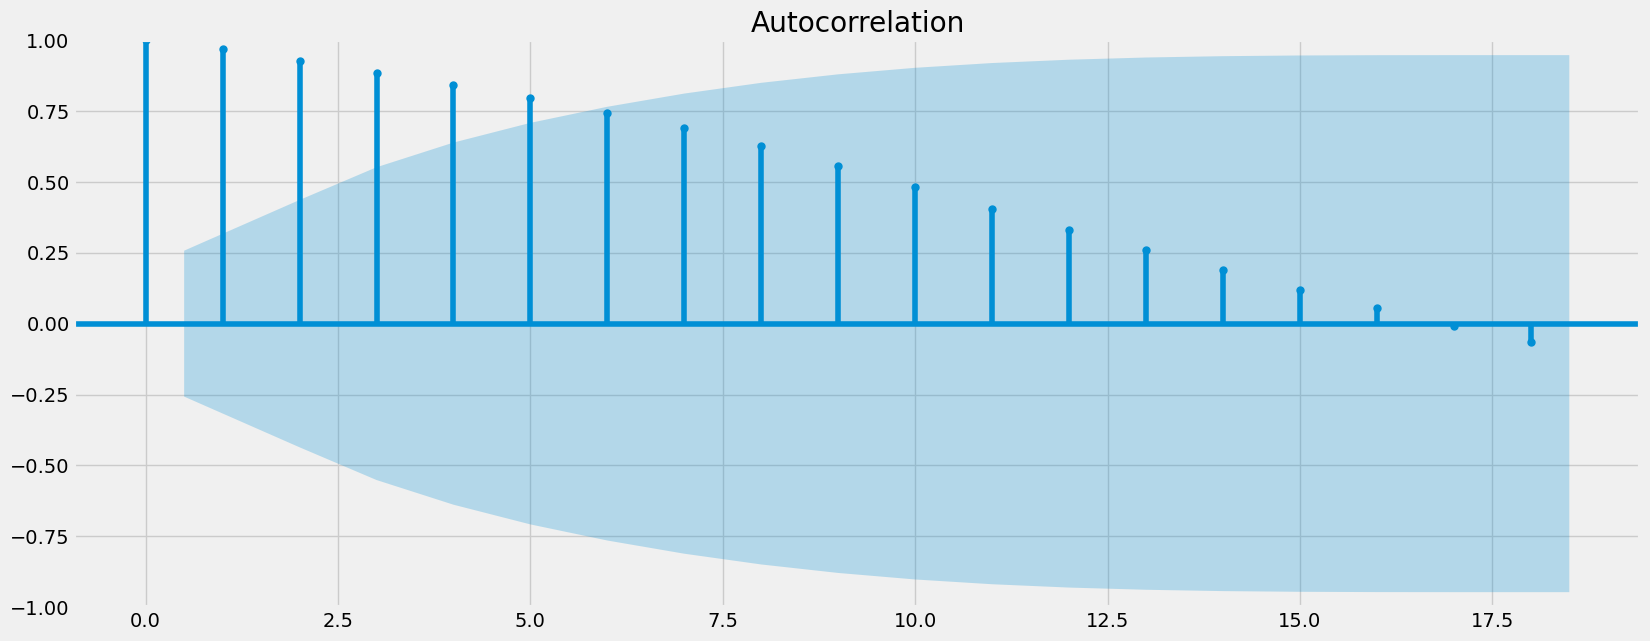

In [42]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #  import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## 4 Differencing Data

In [44]:
# calculating the difference between every value (t) and its lag (t -1) and storing the results in a new dataframe
data_diff = data_sub - data_sub.shift(1) 

In [45]:
data_diff.dropna(inplace = True)
# remove the missing values that came about as a result of the differencing. 
# need to remove these or won't be able to run the Dickey-Fuller test.

In [46]:
data_diff.head()

,Arable Land (% of land area)
datetime,
1962-01-01,-0.385961
1963-01-01,0.270664
1964-01-01,-0.175566
1966-01-01,-0.246862
1967-01-01,-0.132985


In [47]:
data_diff.columns

Index(['Arable Land (% of land area)'], dtype='object')

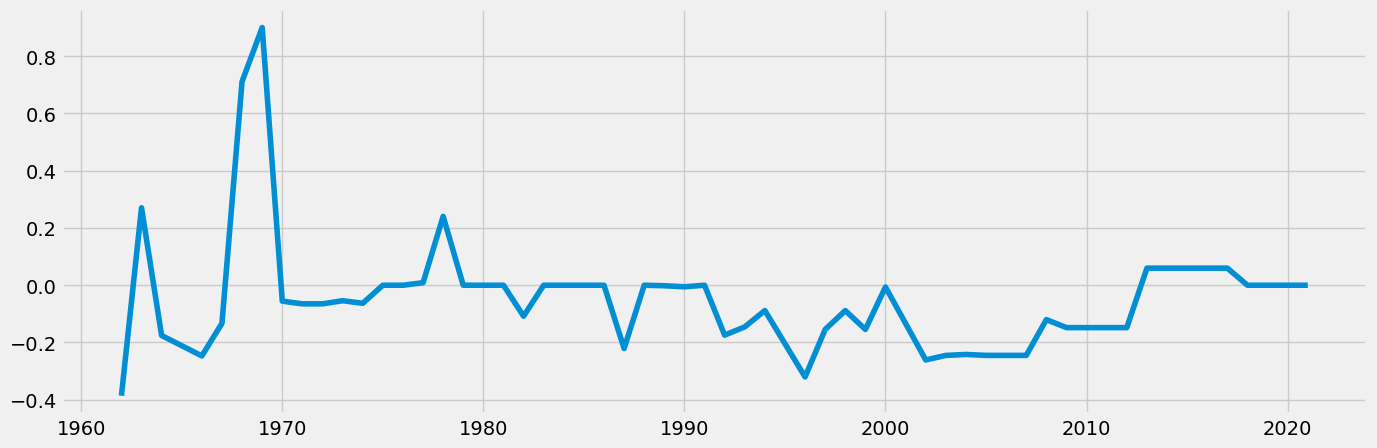

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.481439
p-value                         0.120056
Number of Lags Used             4.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


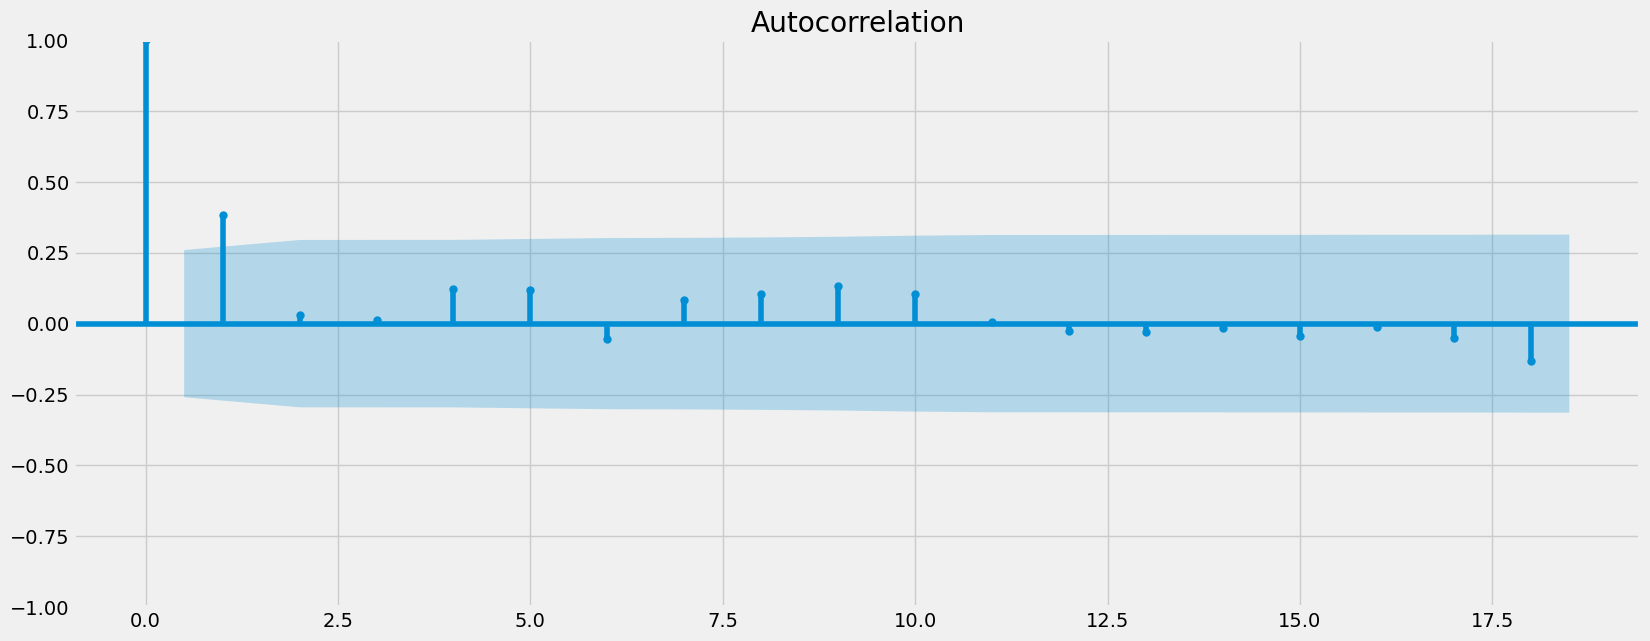

In [50]:
plot_acf(data_diff)
plt.show()

### Still nonstationary. 

## 5 Further Testing

#### another round of differencing
Cannot use log transform since there are negative values

In [54]:
# calculating the difference between every value (t) and its lag (t -1) and storing the results in a new dataframe
data_diff2 = data_diff - data_diff.shift(1) 

In [55]:
data_diff2.dropna(inplace = True)
# remove the missing values that came about as a result of the differencing. 
# need to remove these or won't be able to run the Dickey-Fuller test.

In [56]:
data_diff2.head()

,Arable Land (% of land area)
datetime,
1963-01-01,0.656625
1964-01-01,-0.446230
1966-01-01,-0.071296
1967-01-01,0.113878
1968-01-01,0.844091


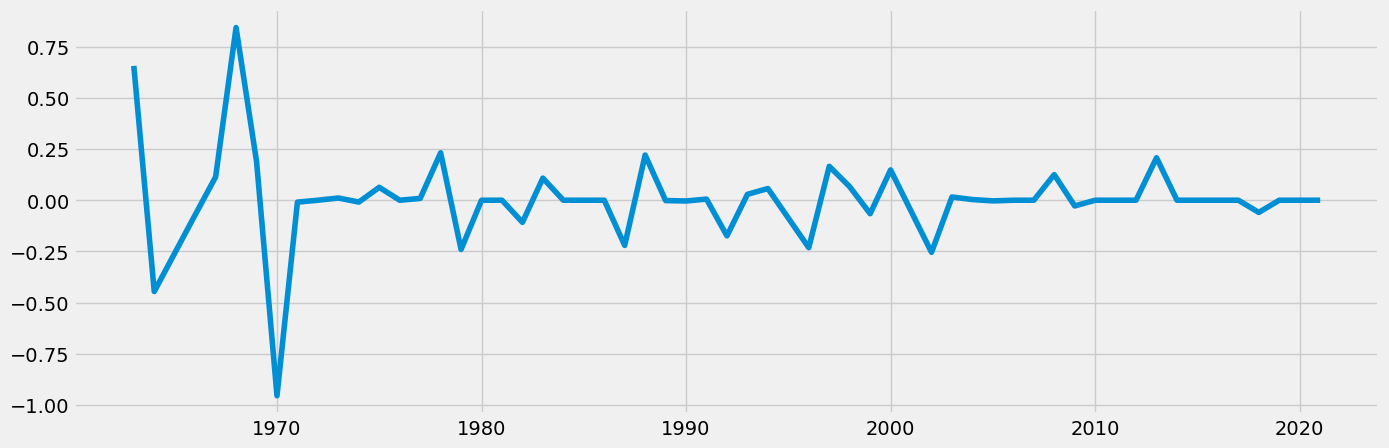

In [57]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [58]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.607622
p-value                         0.000001
Number of Lags Used             3.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


### test statistic is way smaller than crit value @ 1%, can reject null hypothesis
### p-vale < .05, ergo significant

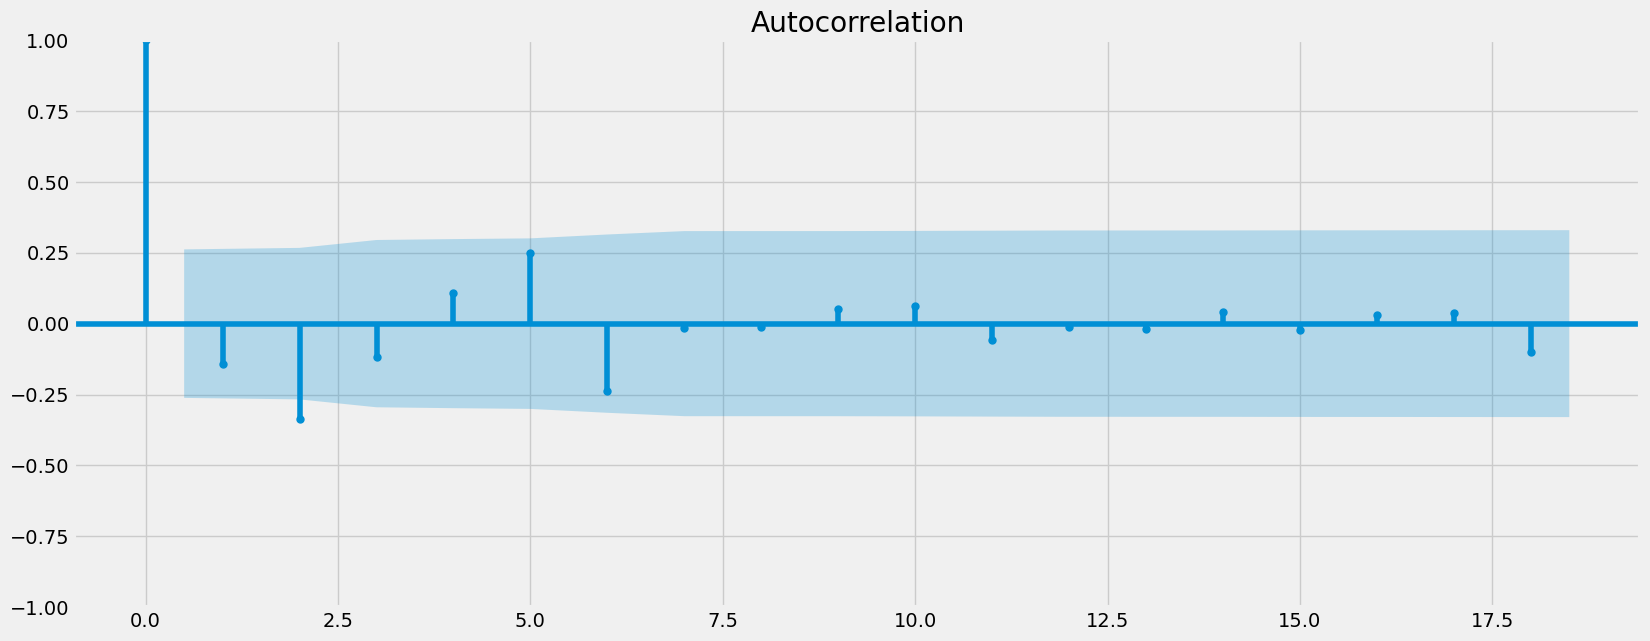

In [60]:
plot_acf(data_diff2)
plt.show()

## 6 Reflection

The data used here is useful in that it provides a visual for how much arable land the US currently has when compared to previous decades. 
It is an important point to make- showing that as climate change takes effect, we also have less land to work with.
Ensuring this data was viable will be useful in further testing.
Reaching a value for the test statistic so significantly below even the 1% crit value shows this data is very valid for the purposes of the project.

Additional testing can be conducted on the data from the project, specifically the Acres Harvested, and sales data in relation to the hardiness zones.